In [48]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2


In [2]:
# change the working directory
# run this every time on start up
# ensures that its referencing the scratch directory which has 3 TB of space
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# YOLO Model V8

In [4]:
baseline_model = YOLO('yolov8x.pt')

#make sure the yolo model sits within the directory of of /scratch/xw10/jj8584
#cp yolov8x.pt /scratch/xw10/jj8584
# use that to move it from the home directory

In [6]:
params = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': False # specifically train the model
}

In [19]:
cat DATA/data.yaml

names:
- Platelets
- RBC
- WBC
nc: 3
train: /scratch/xw10/jj8584/DATA/train/images
val: /scratch/xw10/jj8584/DATA/valid/images


In [3]:
pwd

'/scratch/xw10/jj8584'

## Baseline Model: Train version 1

- In this section we train the baseline model based on the training data.
- In the below sections we look at the performance of trained model and evaluate it.
- based on its differen performance metrics.
- At each stage do the following pipeline ( for each params change)
    - train model
    - validate model
    - predict model

In [21]:
results = baseline_model.train(**params)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 6.23M/6.23M [00:04<00:00, 1.51MB/s]


AMP: checks passed ✅


train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      3.111      9.418      2.581        246        416: 100%|██████████| 48/48 [00:11<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      3.054      2.901      2.412        266        416: 100%|██████████| 48/48 [00:09<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         73        967    0.00774     0.0707    0.00769    0.00167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      2.997      2.898      2.394        224        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         73        967   0.000533     0.0142   0.000281    4.8e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      2.877      2.868      2.363        255        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         73        967    0.00399      0.107    0.00301   0.000431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.439      2.612      2.148        329        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         73        967     0.0568      0.289     0.0362    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.66G      2.244      2.467      2.013        230        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]

                   all         73        967     0.0568      0.289     0.0362    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      2.157      2.288      1.983        196        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         73        967    0.00342     0.0916    0.00242   0.000779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      2.101      2.114      1.944        341        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         73        967    0.00342     0.0916    0.00242   0.000779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      2.032       1.94        1.9        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         73        967      0.134      0.605      0.256     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.953      1.872      1.861        251        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]

                   all         73        967      0.749     0.0855      0.177     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.884      1.811      1.799        331        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         73        967      0.146      0.387      0.139     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.66G      1.837      1.734      1.742        326        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]

                   all         73        967    0.00452     0.0125    0.00743    0.00199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.773      1.613      1.689        287        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all         73        967      0.279       0.52      0.438      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.716      1.504      1.655        327        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         73        967      0.517       0.23      0.307      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.65G      1.682      1.418      1.627        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         73        967      0.525      0.187      0.312      0.152


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.574      1.336      1.601        152        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         73        967       0.28      0.402      0.349       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.447      1.132      1.502        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]

                   all         73        967      0.421      0.322      0.335      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.417      1.102      1.479        159        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]

                   all         73        967      0.341      0.731      0.681      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.395      1.086       1.47        186        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all         73        967      0.477      0.666      0.707      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.405      1.086      1.473        201        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         73        967      0.614      0.664      0.713      0.421



25 epochs completed in 0.080 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


                   all         73        967      0.477      0.666      0.707      0.422
             Platelets         73         76          1          0      0.466      0.248
                   RBC         73        819     0.0657      0.998      0.691      0.406
                   WBC         73         72      0.365          1      0.963      0.613
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


**NOTES**

Class: the class being evaluated.
Images: number of instances in validation dataset/ iteration

Box : Bounding box metrics:
P (Precision): The accuracy of the detected objects, indicating how many detections were correct.

R (Recall): The ability of the model to identify all instances of objects in the images.

mAP50: Mean average precision calculated at an intersection over union (IoU) threshold of 0.50. It's a measure of the model's accuracy considering only the "easy" detections.

mAP50-95: The average of the mean average precision calculated at varying IoU thresholds, ranging from 0.50 to 0.95. It gives a comprehensive view of the model's performance across different levels of detection difficulty.



**OBSERVATIONS**

Precision and Recall
- Overall precision: 47.7% of the time the model is correctly and actually predicting RBC, WBC and Platelts boxes correctly under the right label. The remainder of the time, its misclassifying these cells and predicting alot of False positives against the Ground truth

- Overall recall 66.6% of the time the base model is correctly detecting the correct class instance for RBC, WBC and Platelets objects within the image
- Platelets: Precision is at 100% meaning it predicts the Platelet class when it is absolutely certain. But missing alot of the actual positive instances
  - It could be that YOLOv8 is conservative in making these platelet predictions and avoids FPs at the cost of missing TPs. 
  - for instance see Valbatch1 labels (the labels given by ground truth) and see the valbatch1_pred.jpg. Nothing is getting predicted because the model looks at all the overlapped cells and is not confident at what its looking at hence recall is 0 and therefore can't detect when it sees a a new test image.
  - 0 recall is disastarous as it completely defies the need for object detection

- RBC: low precision (0.0657). This means that the 6.5% of the object detected are RBCs out of ALL the predicted objects as RBC = correctly predicted TP are very low. The model is however detecting RBCs with high recall. All RBCs are being detected and of those detected as RBCs 99% of those detections are true.
- WBC: Recall 100% of all WBC detections are being detected as true. But Precision is moderate with 36% of the time correctly detecting and classifying WBCs


OVERALL:

- Model is performing okay. Not great however
- Detection capabilities is extremely poor
- its okay for WBCs but completely fails for RBCs with a large number of FPs. It fails to predict anything due to its lack in confidence as it can't tell the difference between overlapped cells.

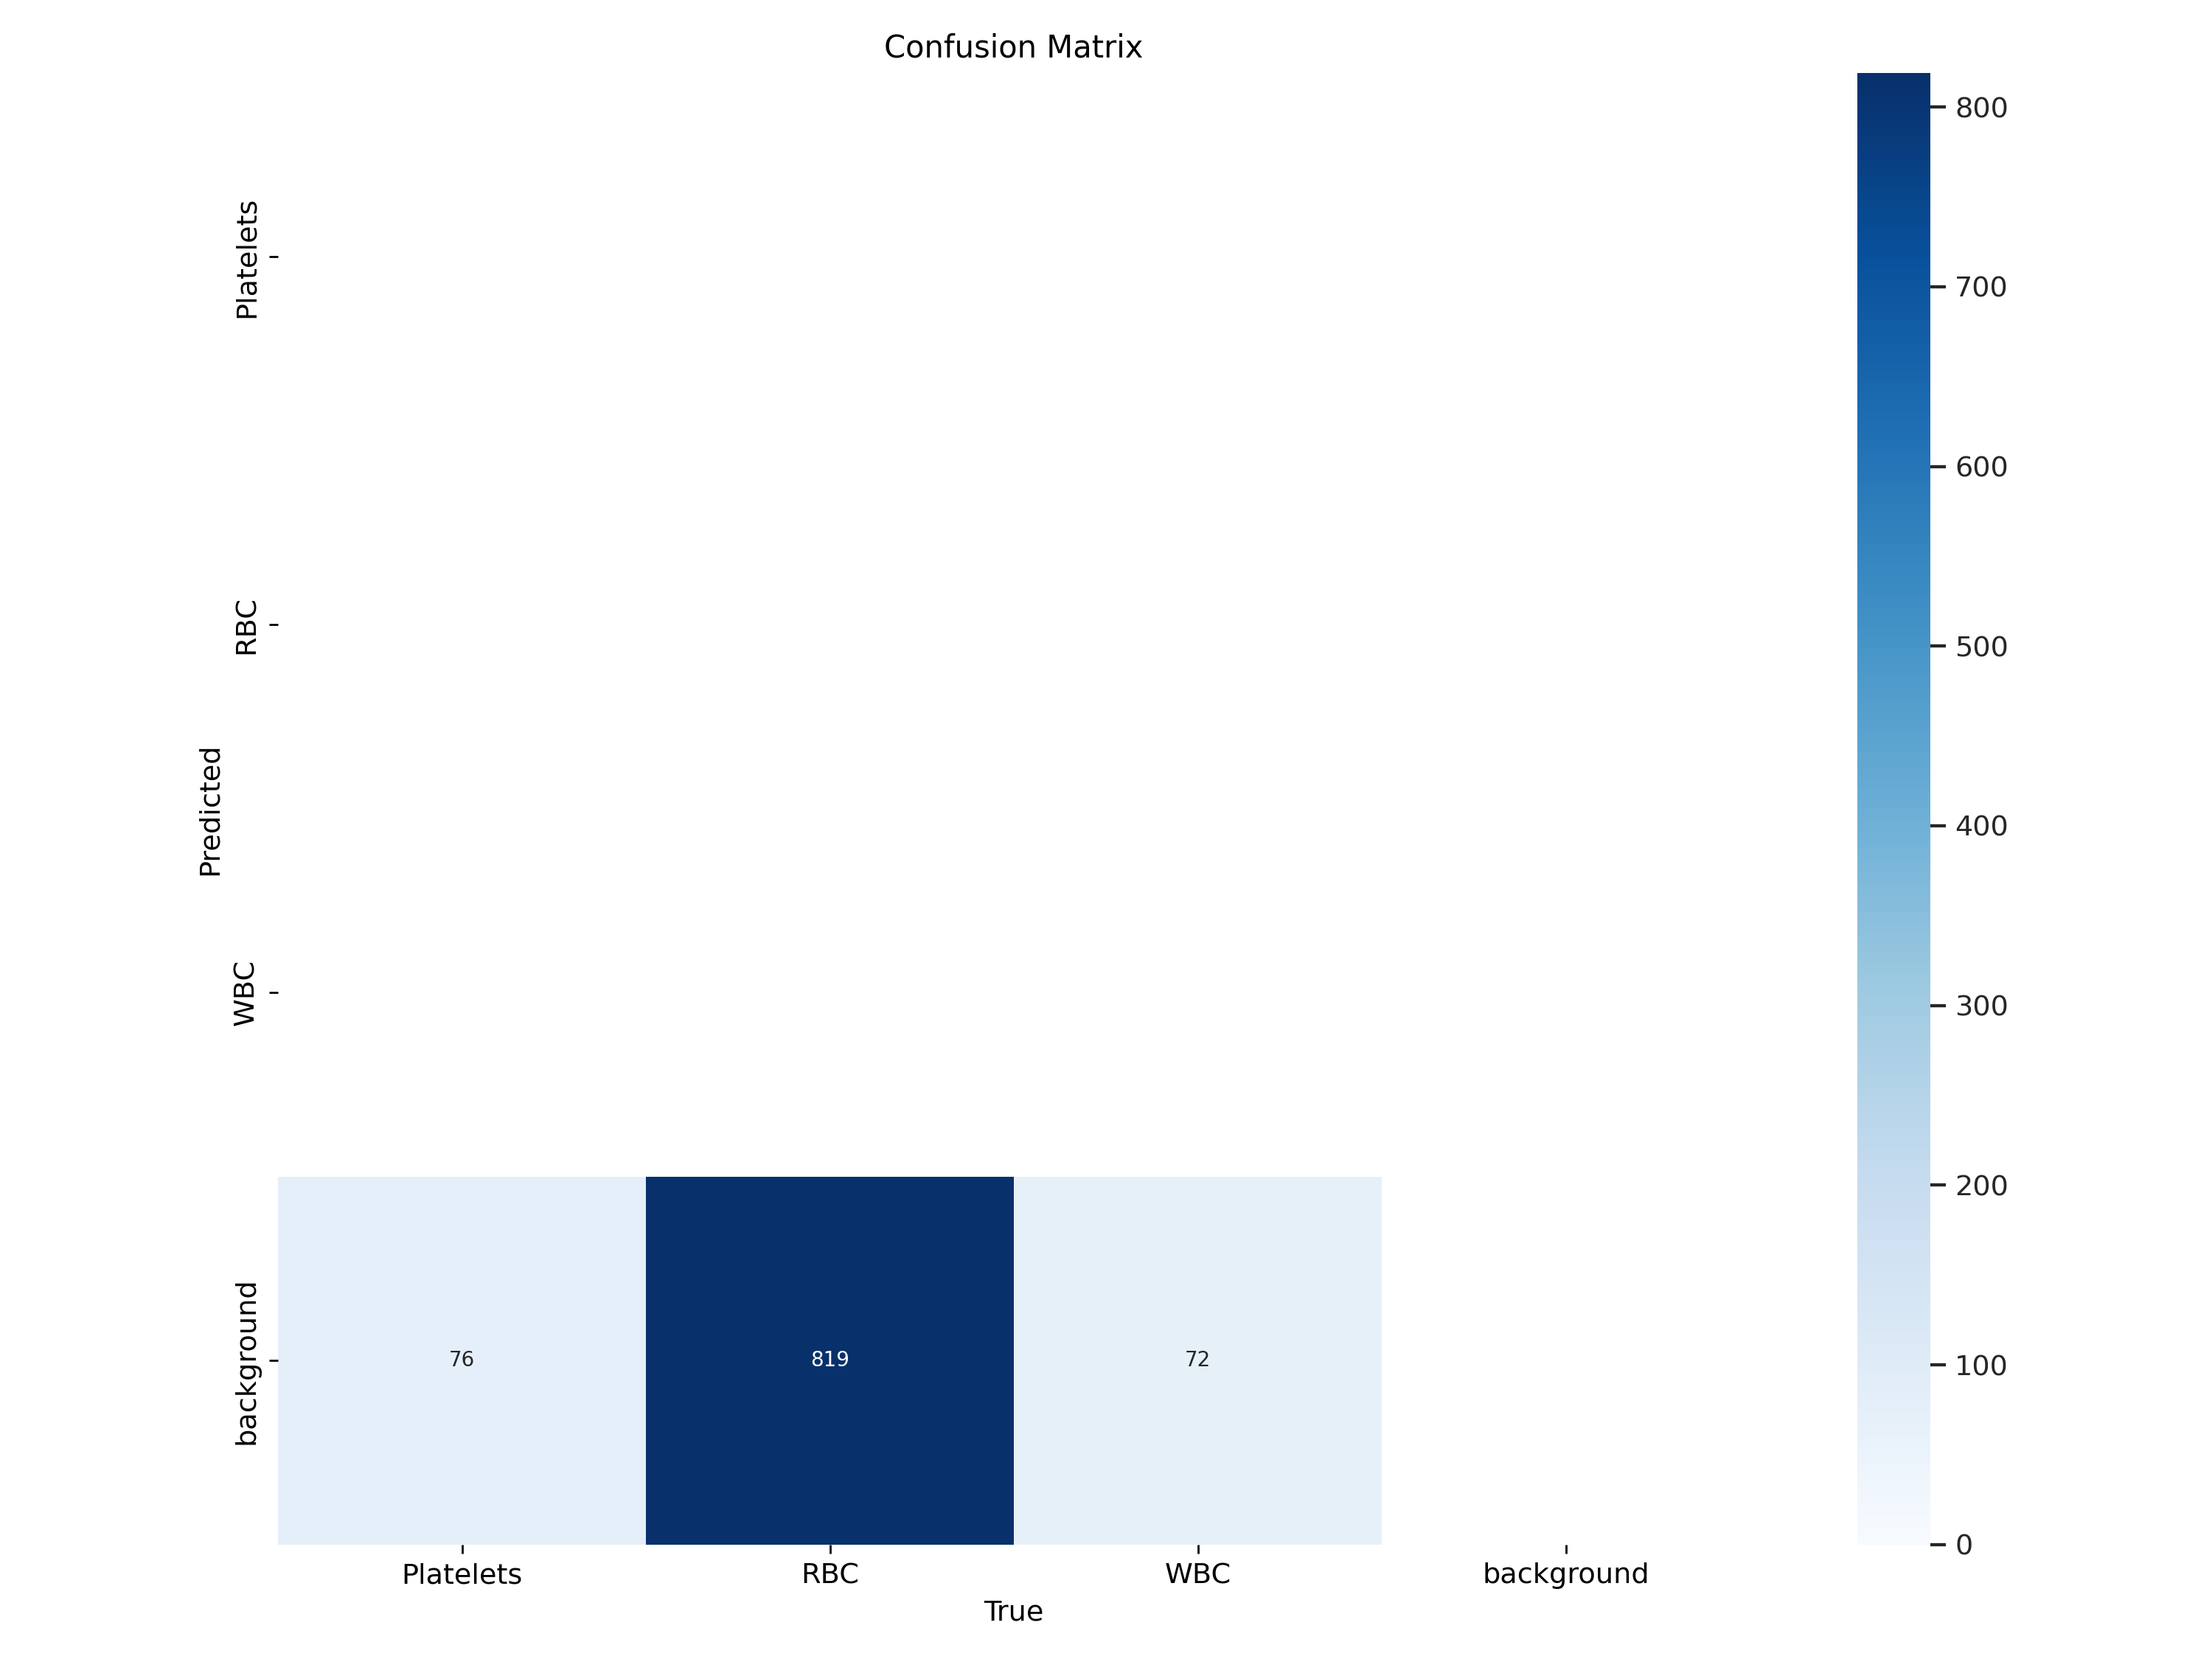

In [29]:
Image(filename =f'runs/detect/train2/confusion_matrix.png', width = 800)

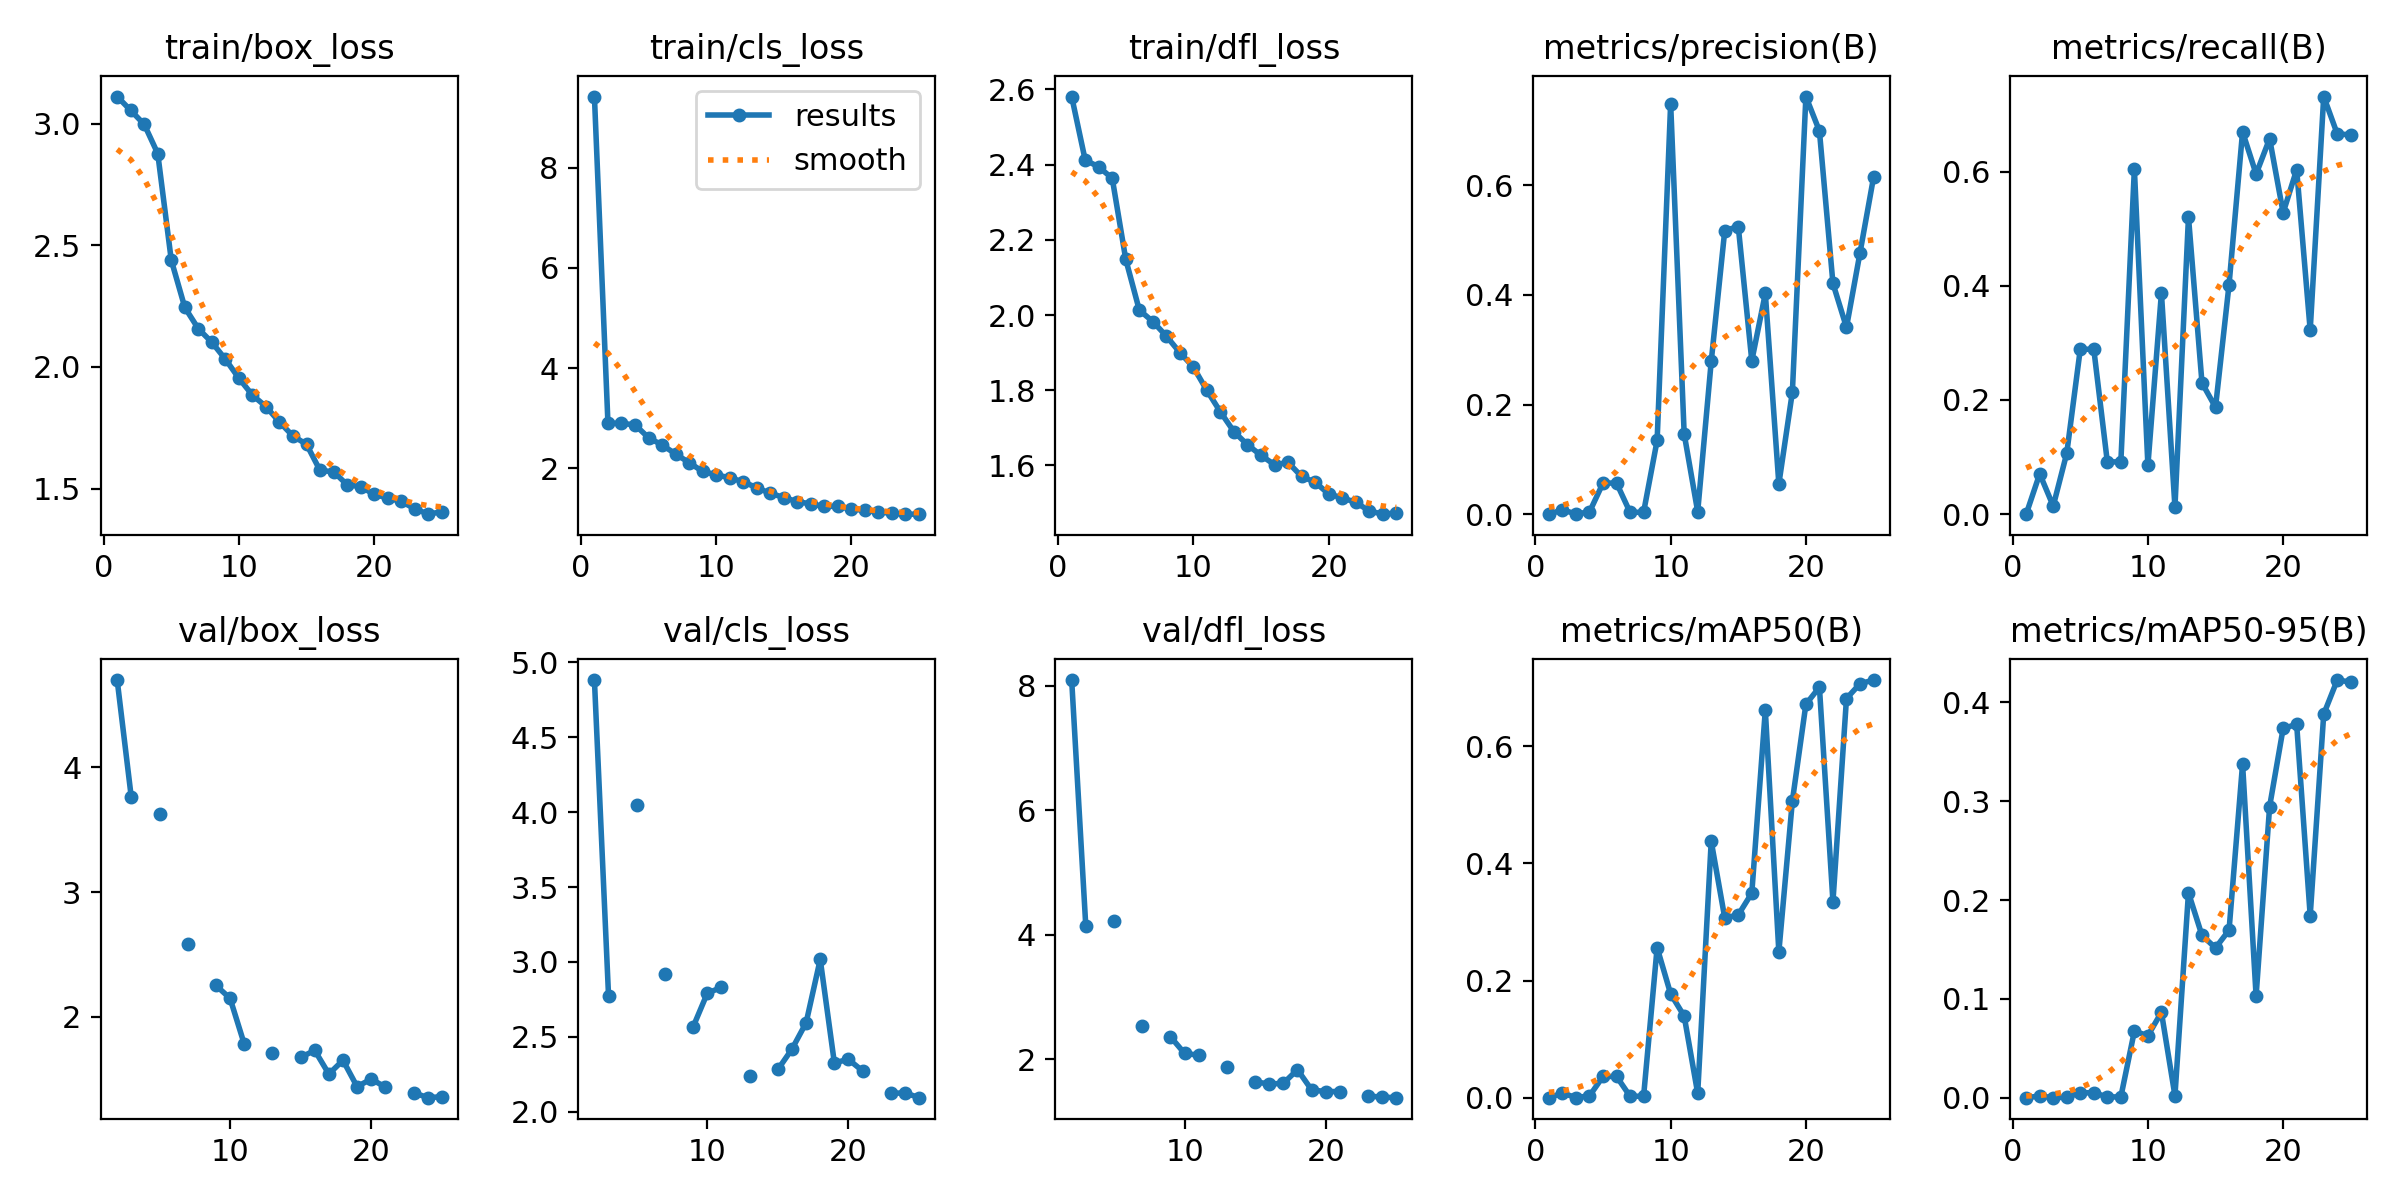

In [30]:
Image(filename =f'runs/detect/train2/results.png', width = 800)

**General Notes**

- AP has general upwards trend and approaches 1 at the 50% threshold. Peaks at around 0.7
- reasonably okay that the MAP is increasing. But large dops between epochs

## Baseline Model: Train version 2

In [7]:
results1 = baseline_model.train(**params)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      3.111      9.418      2.581        246        416: 100%|██████████| 48/48 [00:18<00:00,  2.65it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      3.054      2.901      2.412        266        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      2.997      2.898      2.394        224        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.877      2.868      2.363        255        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.439      2.612      2.148        329        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      2.244      2.467      2.013        230        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      2.157      2.288      1.983        196        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      2.101      2.114      1.944        341        416: 100%|██████████| 48/48 [00:10<00:00,  4.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      2.032       1.94        1.9        296        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.65G      1.953      1.872      1.861        251        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.66G      1.884      1.811      1.799        331        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.66G      1.837      1.734      1.742        326        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.773      1.613      1.689        287        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.716      1.504      1.655        327        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.63G      1.682      1.418      1.627        221        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.574      1.336      1.601        152        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.569      1.292      1.608        177        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.516      1.241       1.57        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.508      1.244      1.555        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.476      1.185      1.524        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.462      1.164      1.514        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.447      1.132      1.502        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.417      1.102      1.479        159        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.395      1.086       1.47        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.405      1.086      1.473        201        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


                   all         73        967      0.797      0.838      0.862      0.535

25 epochs completed in 0.081 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


                   all         73        967      0.798      0.836      0.863      0.534
             Platelets         73         76      0.786      0.711      0.806      0.371
                   RBC         73        819      0.674      0.799       0.81      0.531
                   WBC         73         72      0.933          1      0.972      0.701
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


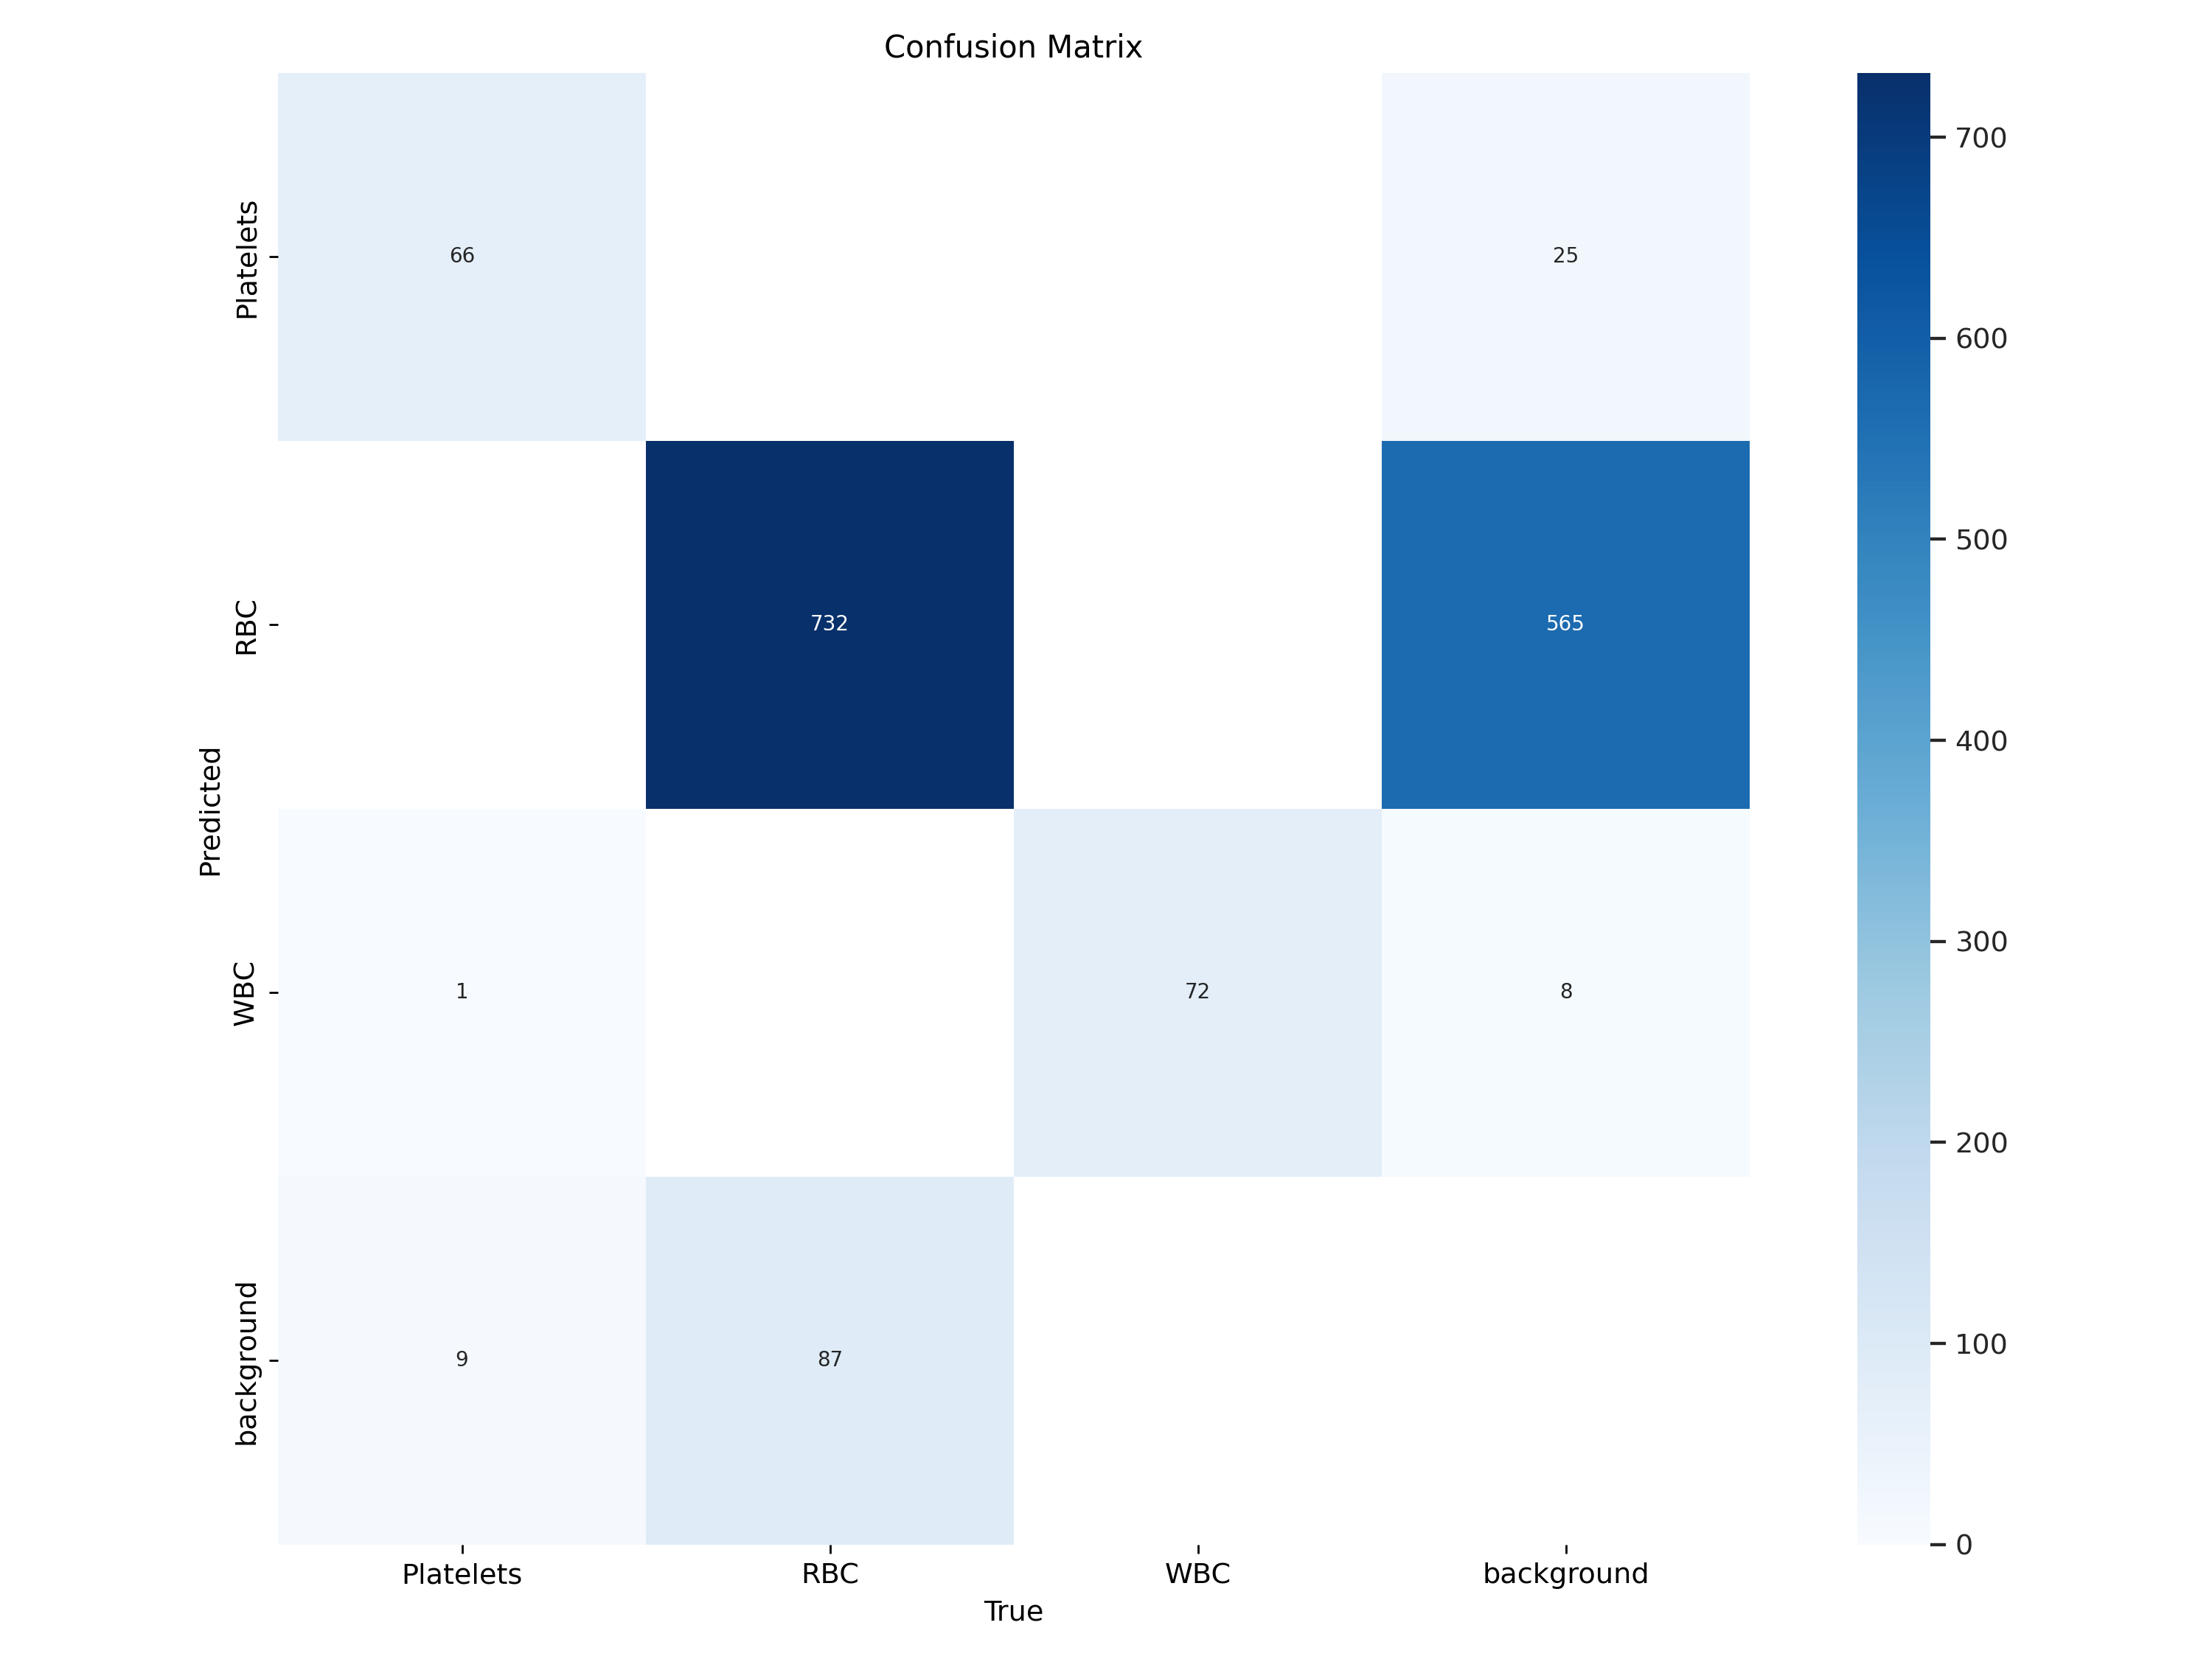

In [8]:
Image(filename =f'runs/detect/train3/confusion_matrix.png', width = 800)

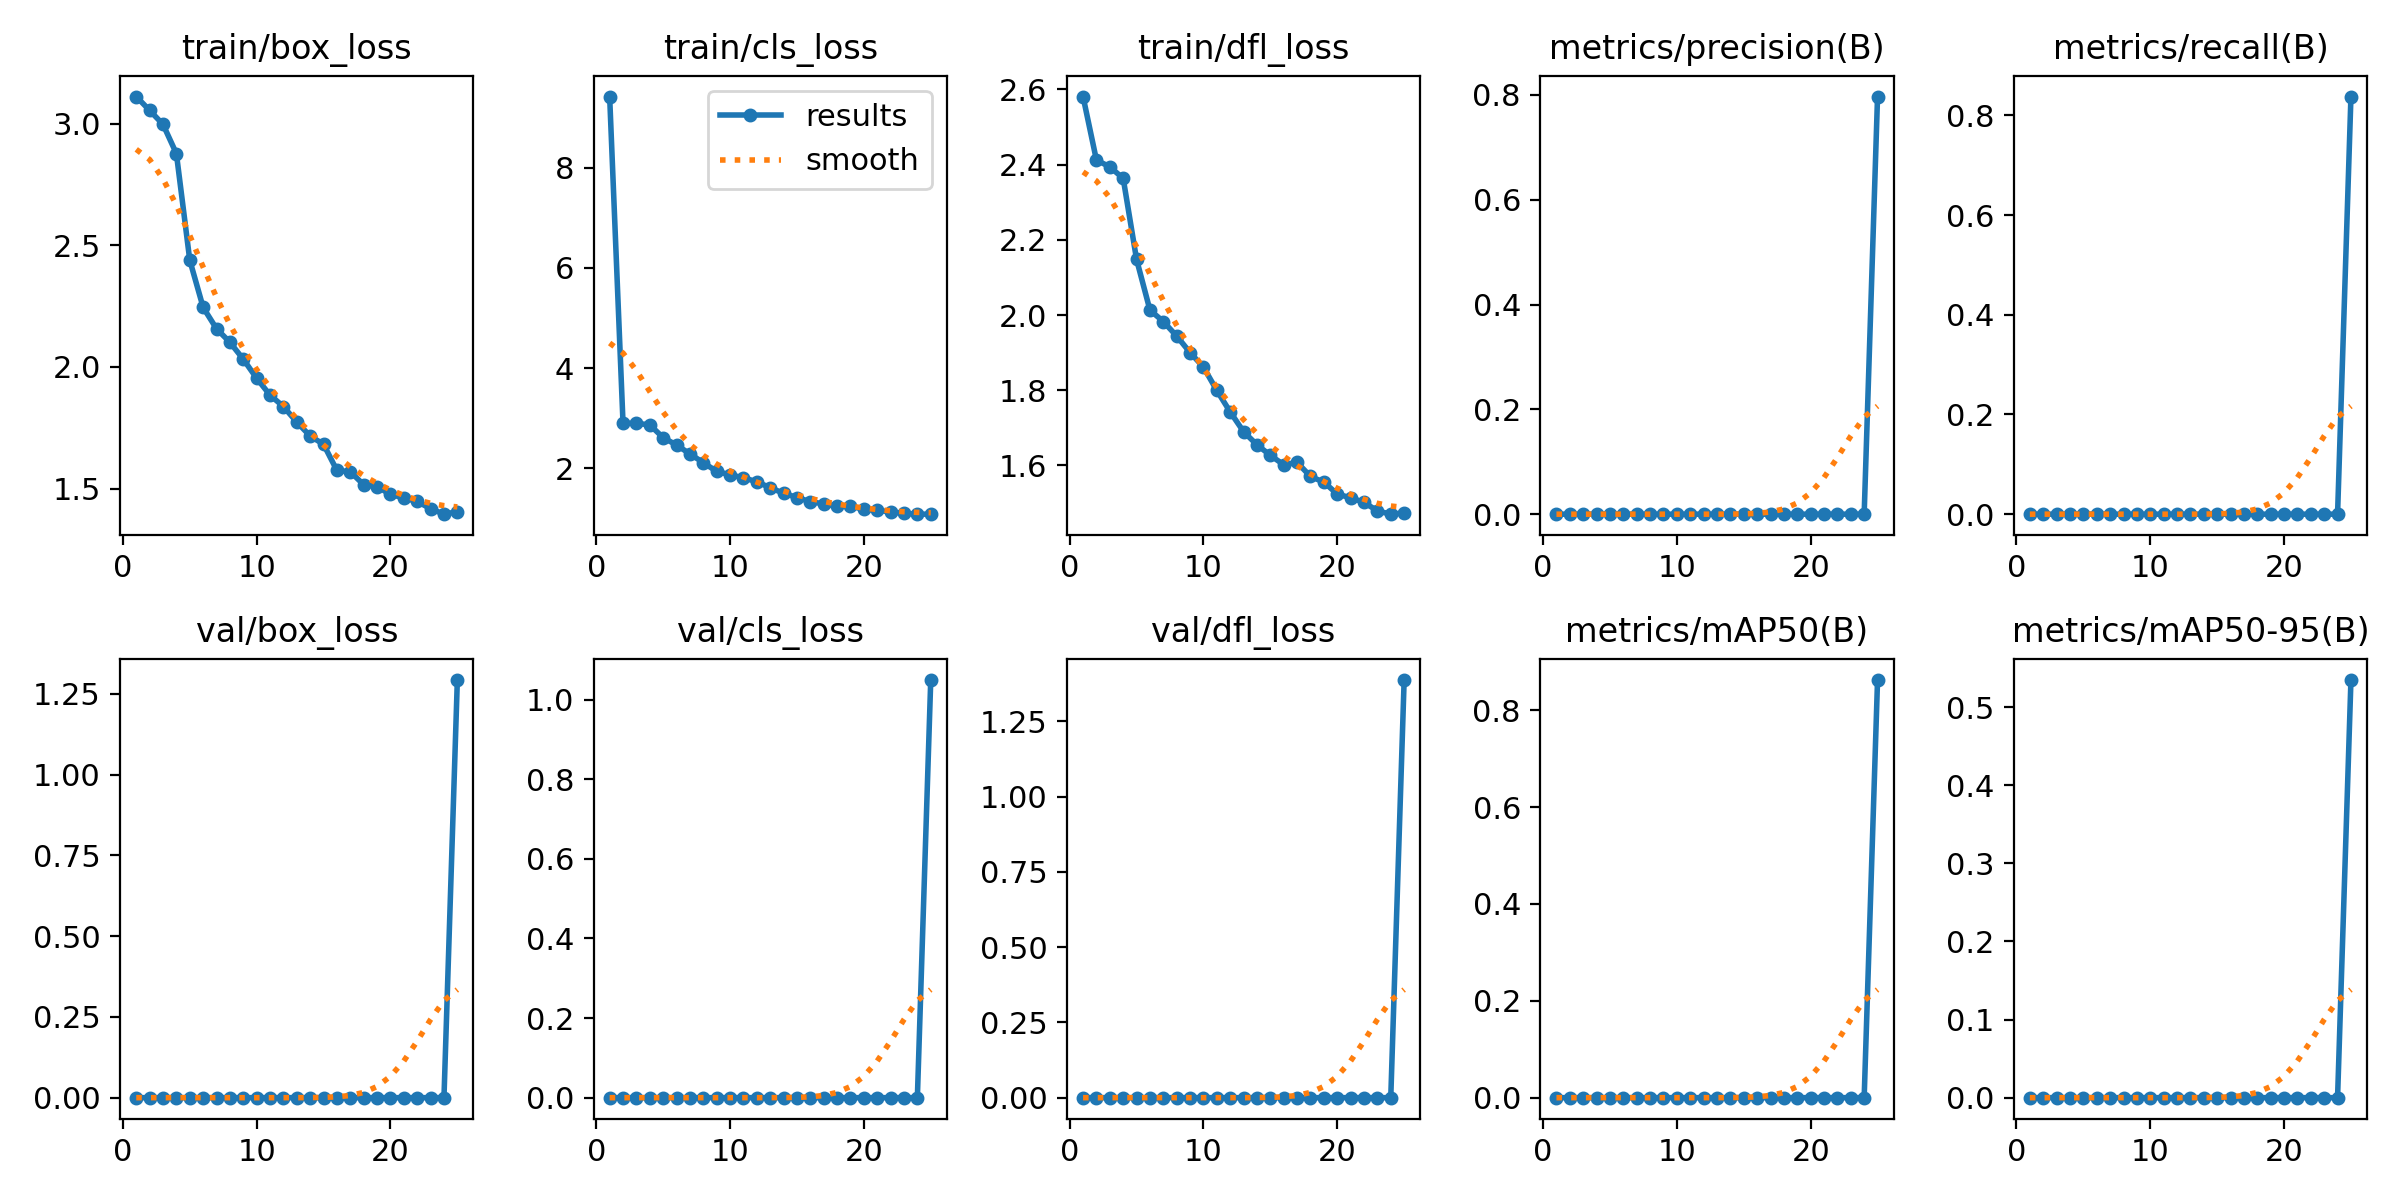

In [10]:
Image(filename =f'runs/detect/train3/results.png', width = 800)



**NOTES**

High metric values on training data.
Much Improved Precision, Accuracy, Recall etc. from previous run.
This is ofcourse due to the fact that its not validating its performance on anything and therefore these metrics will be high.
Loss generally getting smaller as number of epochs goes on.
But random spike on the last epoch.

### Baseline Model Validation

In [12]:
results1_val1 = YOLO('runs/detect/train240524/weights/best.pt')
metrics = results1_val1.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


                   all         73        967      0.797      0.837      0.863      0.534
             Platelets         73         76      0.784      0.711      0.806      0.372
                   RBC         73        819      0.674      0.801       0.81       0.53
                   WBC         73         72      0.933          1      0.972        0.7
Speed: 0.1ms preprocess, 13.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


In [14]:
metrics.box.map    # map50-95

0.5341231870191598

In [15]:
metrics.box.map50  # map50

0.8625468429206871

In [16]:
metrics.box.map75  # map75

0.5955164466466382

In [55]:
metrics.box.maps   # a list contains map50-95 of each category

array([    0.37181,     0.53012,     0.70044])

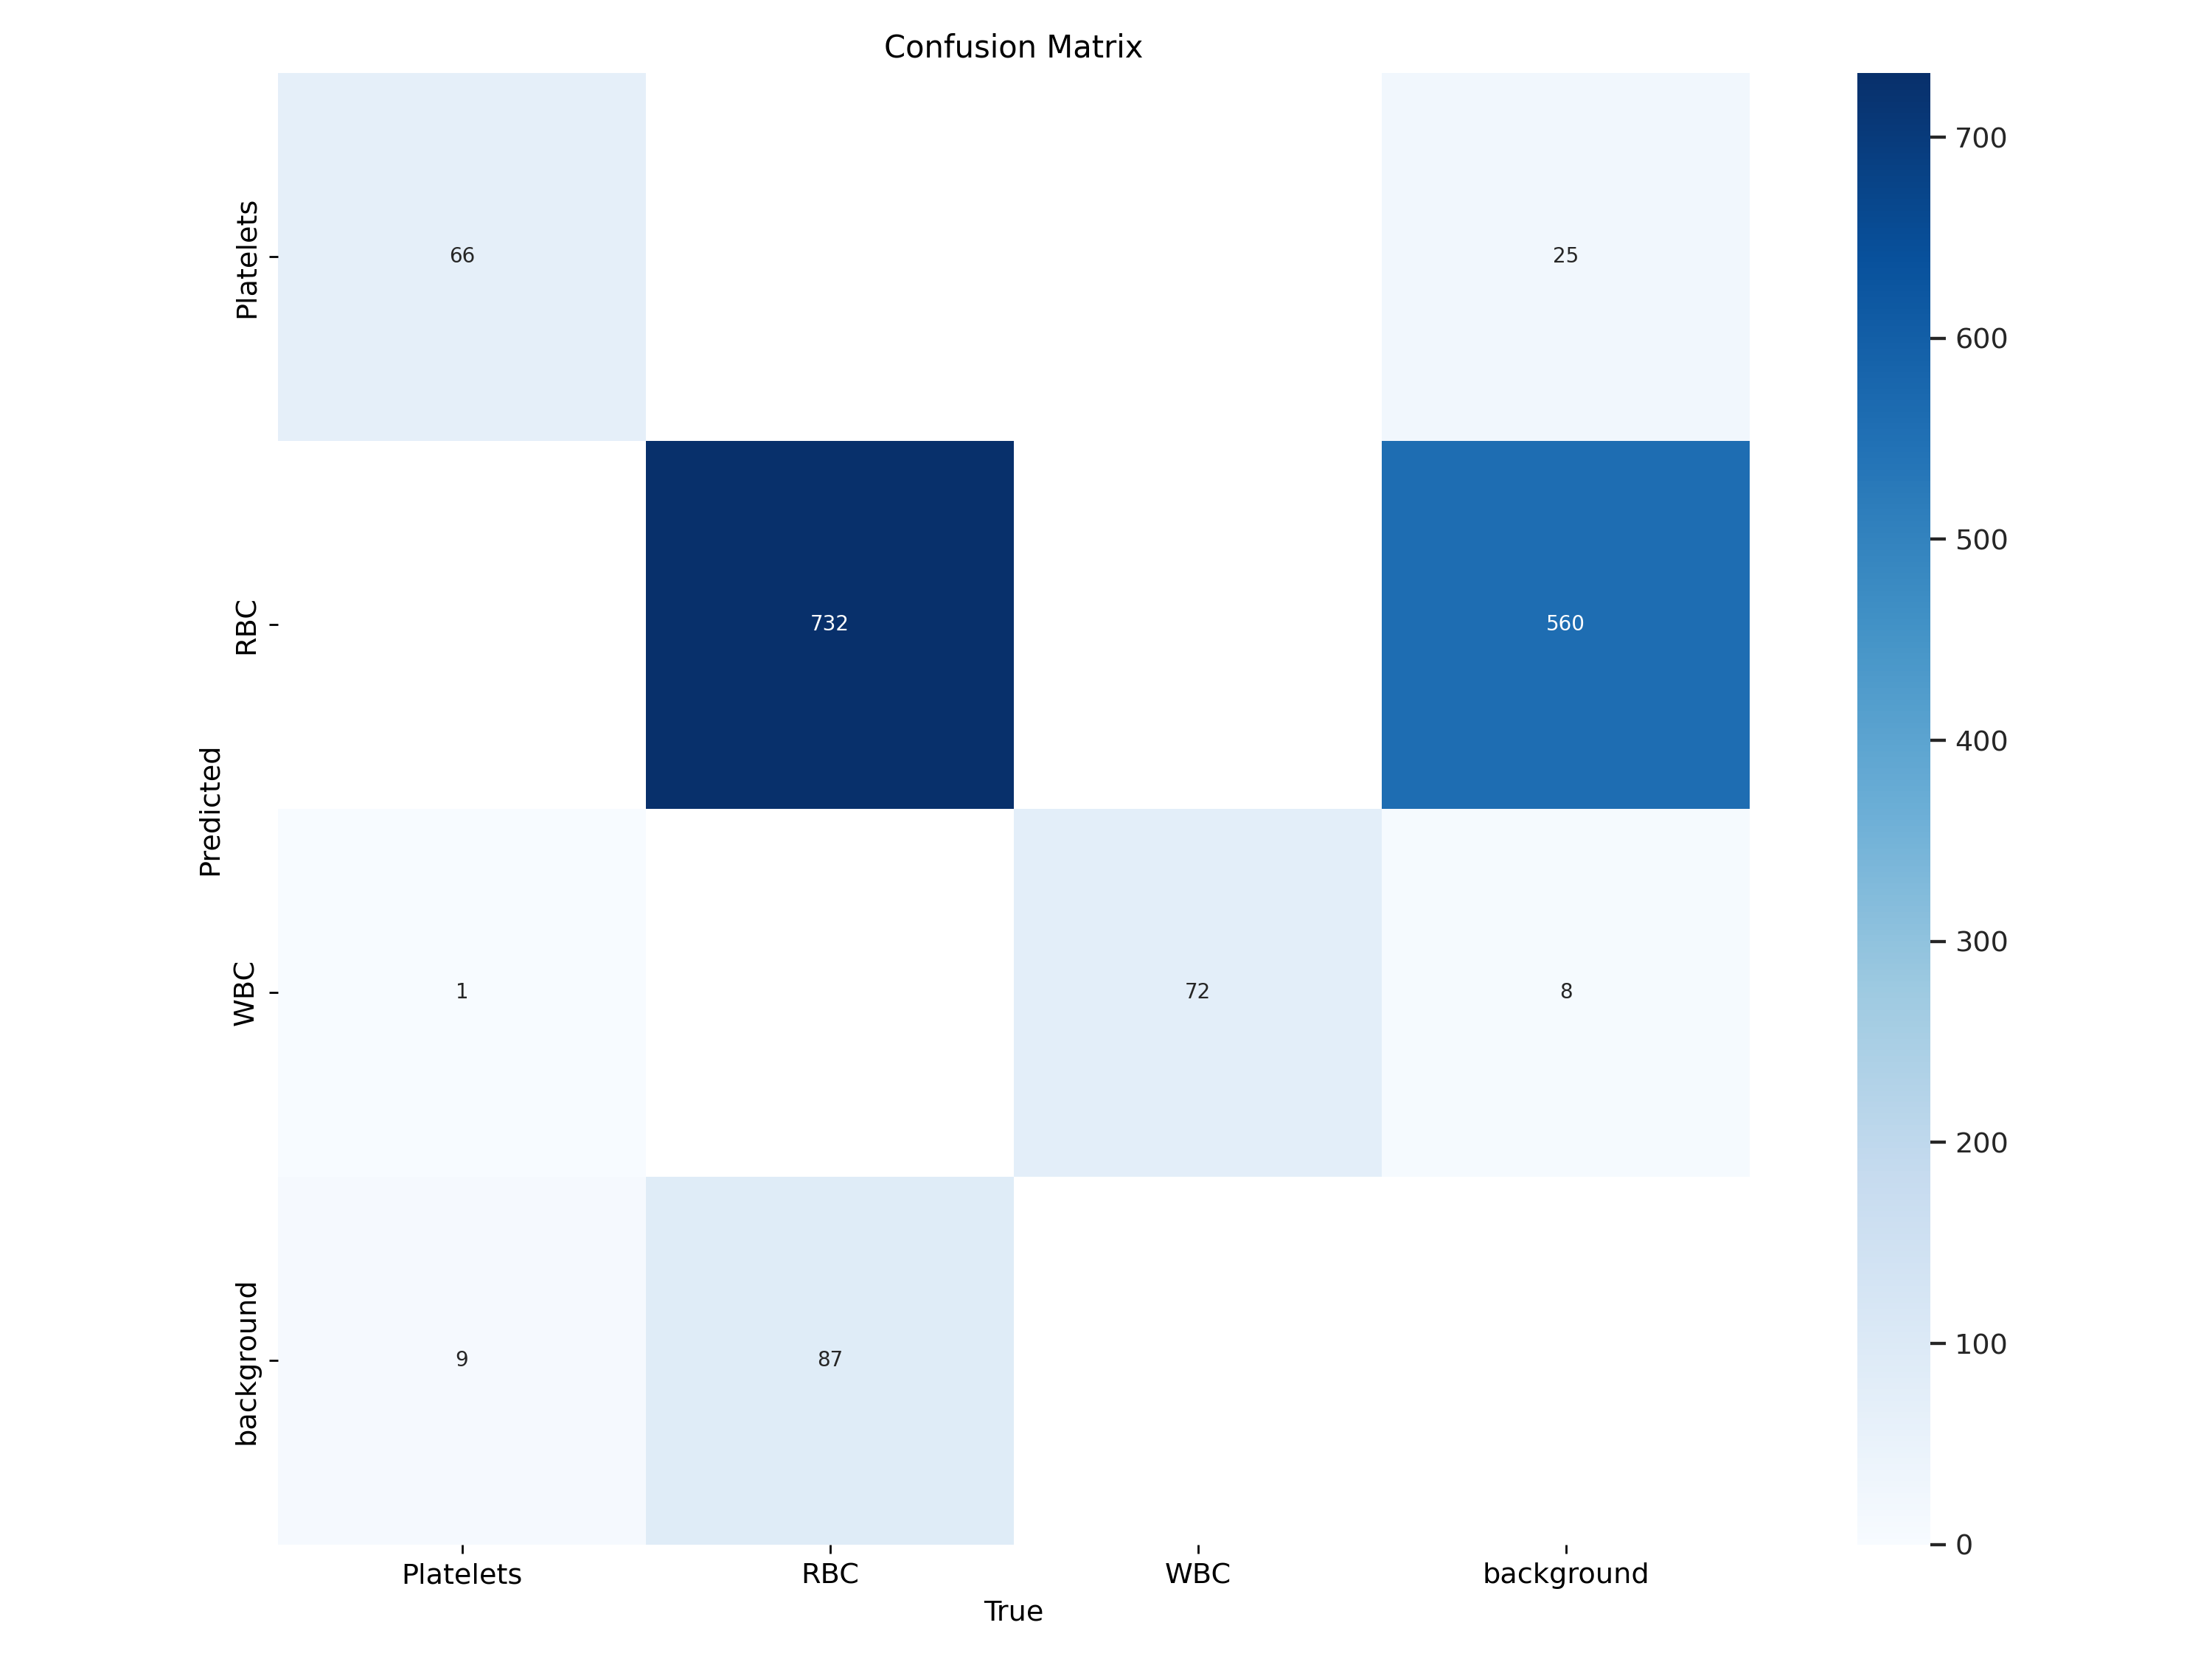

In [56]:
Image(filename =f'runs/detect/val240524/confusion_matrix.png', width = 800)

### Baseline Model Prediction

In [21]:
results1_pred1 = results1_val1(['DATA/test/images/BloodImage_00241_jpg.rf.757020b43fe3414a0f66770f54da283f.jpg'])


0: 416x416 23 RBCs, 1 WBC, 47.9ms
Speed: 2.0ms preprocess, 47.9ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 416)


In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='RESULT_BloodImage_00241_jpg.jpg')  # save to disk

## Adjusted Parameters: Label Smoothing

**Label Smoothing**

- regularisation technique
- in DL >> prevents overfitting and improves model's generalisation
- Object detection >> improves models performance by reducing effect of noisy or incorrect annotations

- Class label for RBC, WBCs and Platelets >> one hot encoded
- But one hot encoding makes the assumption that labels are completely accurate.
- This might not always be the case due to human annotation errors or even ambiguity in the data
- Label smoothing >> replaces the one hot encoded values with a smoothed distribution over the classes
- assigns small non-zero values to the true class label and small non-0 to all other labels
- reduces the effect of noisy/ incorrect annotations

- model is encouraged to be less confident about the training labels and more robust to small changes in the input
- ADV: improved accuracy, generalisation, reduced sensitivity to choice of hyper params like learning rate and weight decay
- Tradeoff: can also reduce the model's ability to fit the training data precisely. Use it judiciously and with other regularization techniques such as dropout and weight decay.

In [58]:
params['label_smoothing'] = 0.15
results1_labsmth1 = YOLO('runs/detect/train240524/weights/best.pt')
results1_labsmth1.train(**params)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.72G      1.583      1.277      1.554        246        416: 100%|██████████| 48/48 [00:10<00:00,  4.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.06G      1.596      1.326      1.574        266        416: 100%|██████████| 48/48 [00:09<00:00,  4.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.03G      1.563      1.271      1.541        224        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      8.05G      1.592      1.273      1.554        255        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      8.08G      1.643       1.32      1.596        329        416: 100%|██████████| 48/48 [00:09<00:00,  4.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.05G      1.581      1.274      1.541        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      8.05G      1.536       1.22       1.51        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.02G      1.523      1.192      1.508        341        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.04G      1.549      1.186      1.518        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.04G      1.502      1.158      1.494        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.06G      1.455      1.126      1.462        331        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.06G      1.453      1.117      1.464        326        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.03G      1.433      1.115      1.437        287        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.04G      1.451      1.104      1.457        327        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.04G      1.456      1.075      1.463        221        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         8G      1.404      1.063      1.473        152        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         8G      1.358      1.036      1.436        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.99G      1.355      1.021      1.443        169        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.99G      1.331     0.9977      1.418        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         8G      1.303     0.9747        1.4        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         8G      1.288     0.9558      1.389        147        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.99G      1.268     0.9367      1.379        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.99G      1.257     0.9213      1.367        159        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      7.99G      1.239     0.9083      1.356        186        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         8G      1.246      0.911      1.357        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


                   all         73        967      0.804      0.905      0.894      0.601

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


                   all         73        967      0.804      0.904      0.894      0.601
             Platelets         73         76      0.791      0.842      0.862      0.466
                   RBC         73        819      0.661       0.87      0.848      0.583
                   WBC         73         72       0.96          1      0.971      0.753
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14d24eeb2950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [59]:
results1_labsmth1_val = YOLO('runs/detect/train3/weights/best.pt')
metrics = results1_labsmth1_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


                   all         73        967      0.804      0.904      0.894      0.598
             Platelets         73         76      0.791      0.842      0.862      0.458
                   RBC         73        819      0.661      0.871      0.848      0.583
                   WBC         73         72       0.96          1      0.971      0.753
Speed: 0.1ms preprocess, 8.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


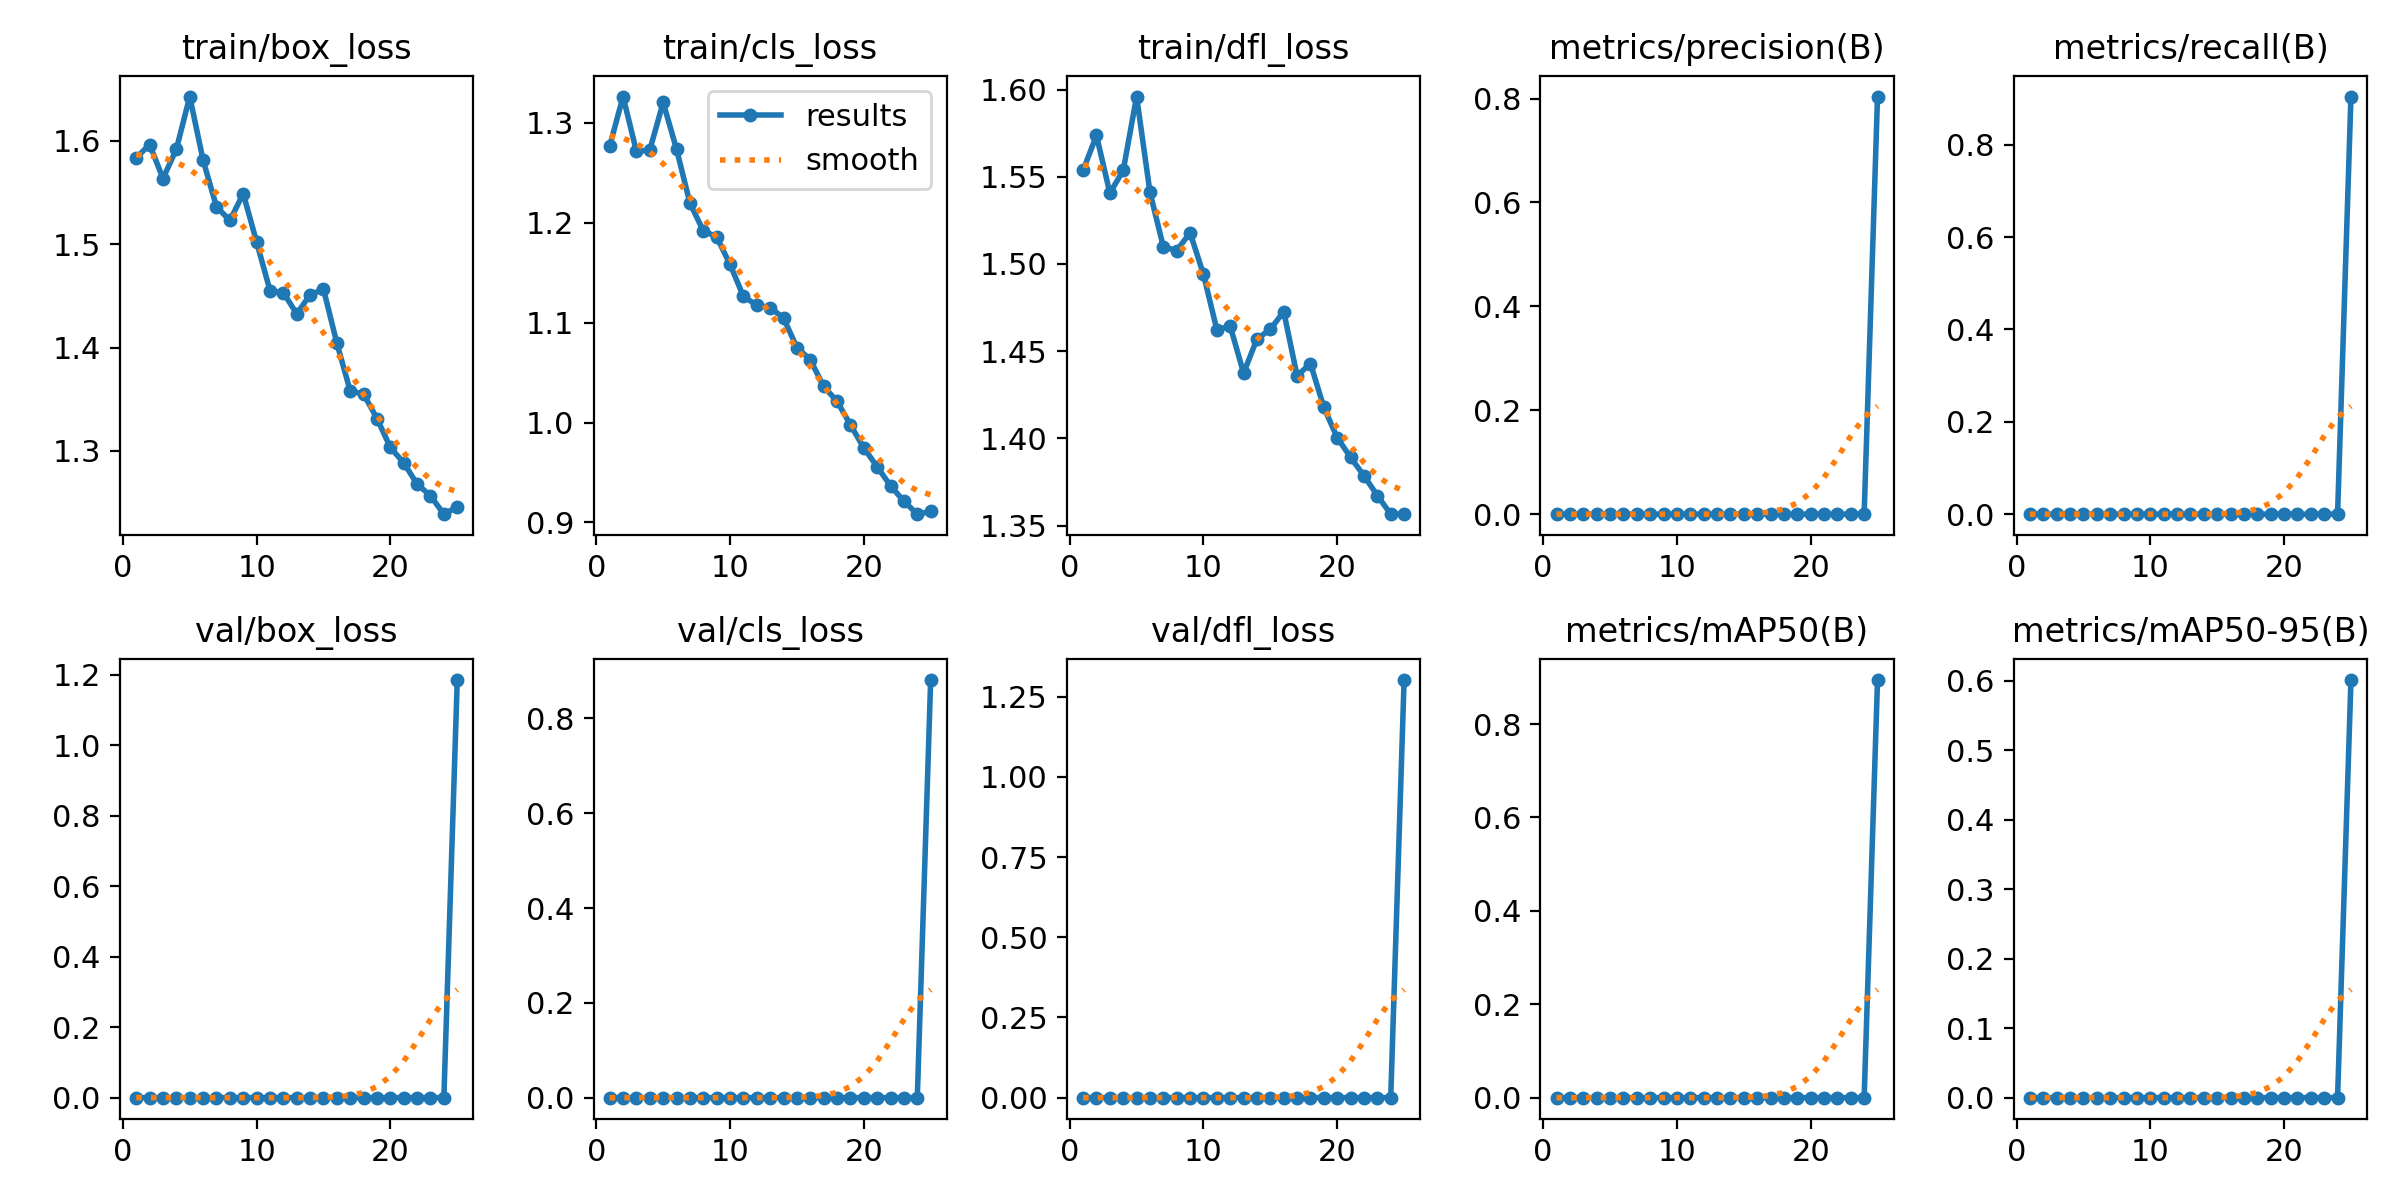

In [60]:
Image(filename =f'runs/detect/train3/results.png', width = 800)

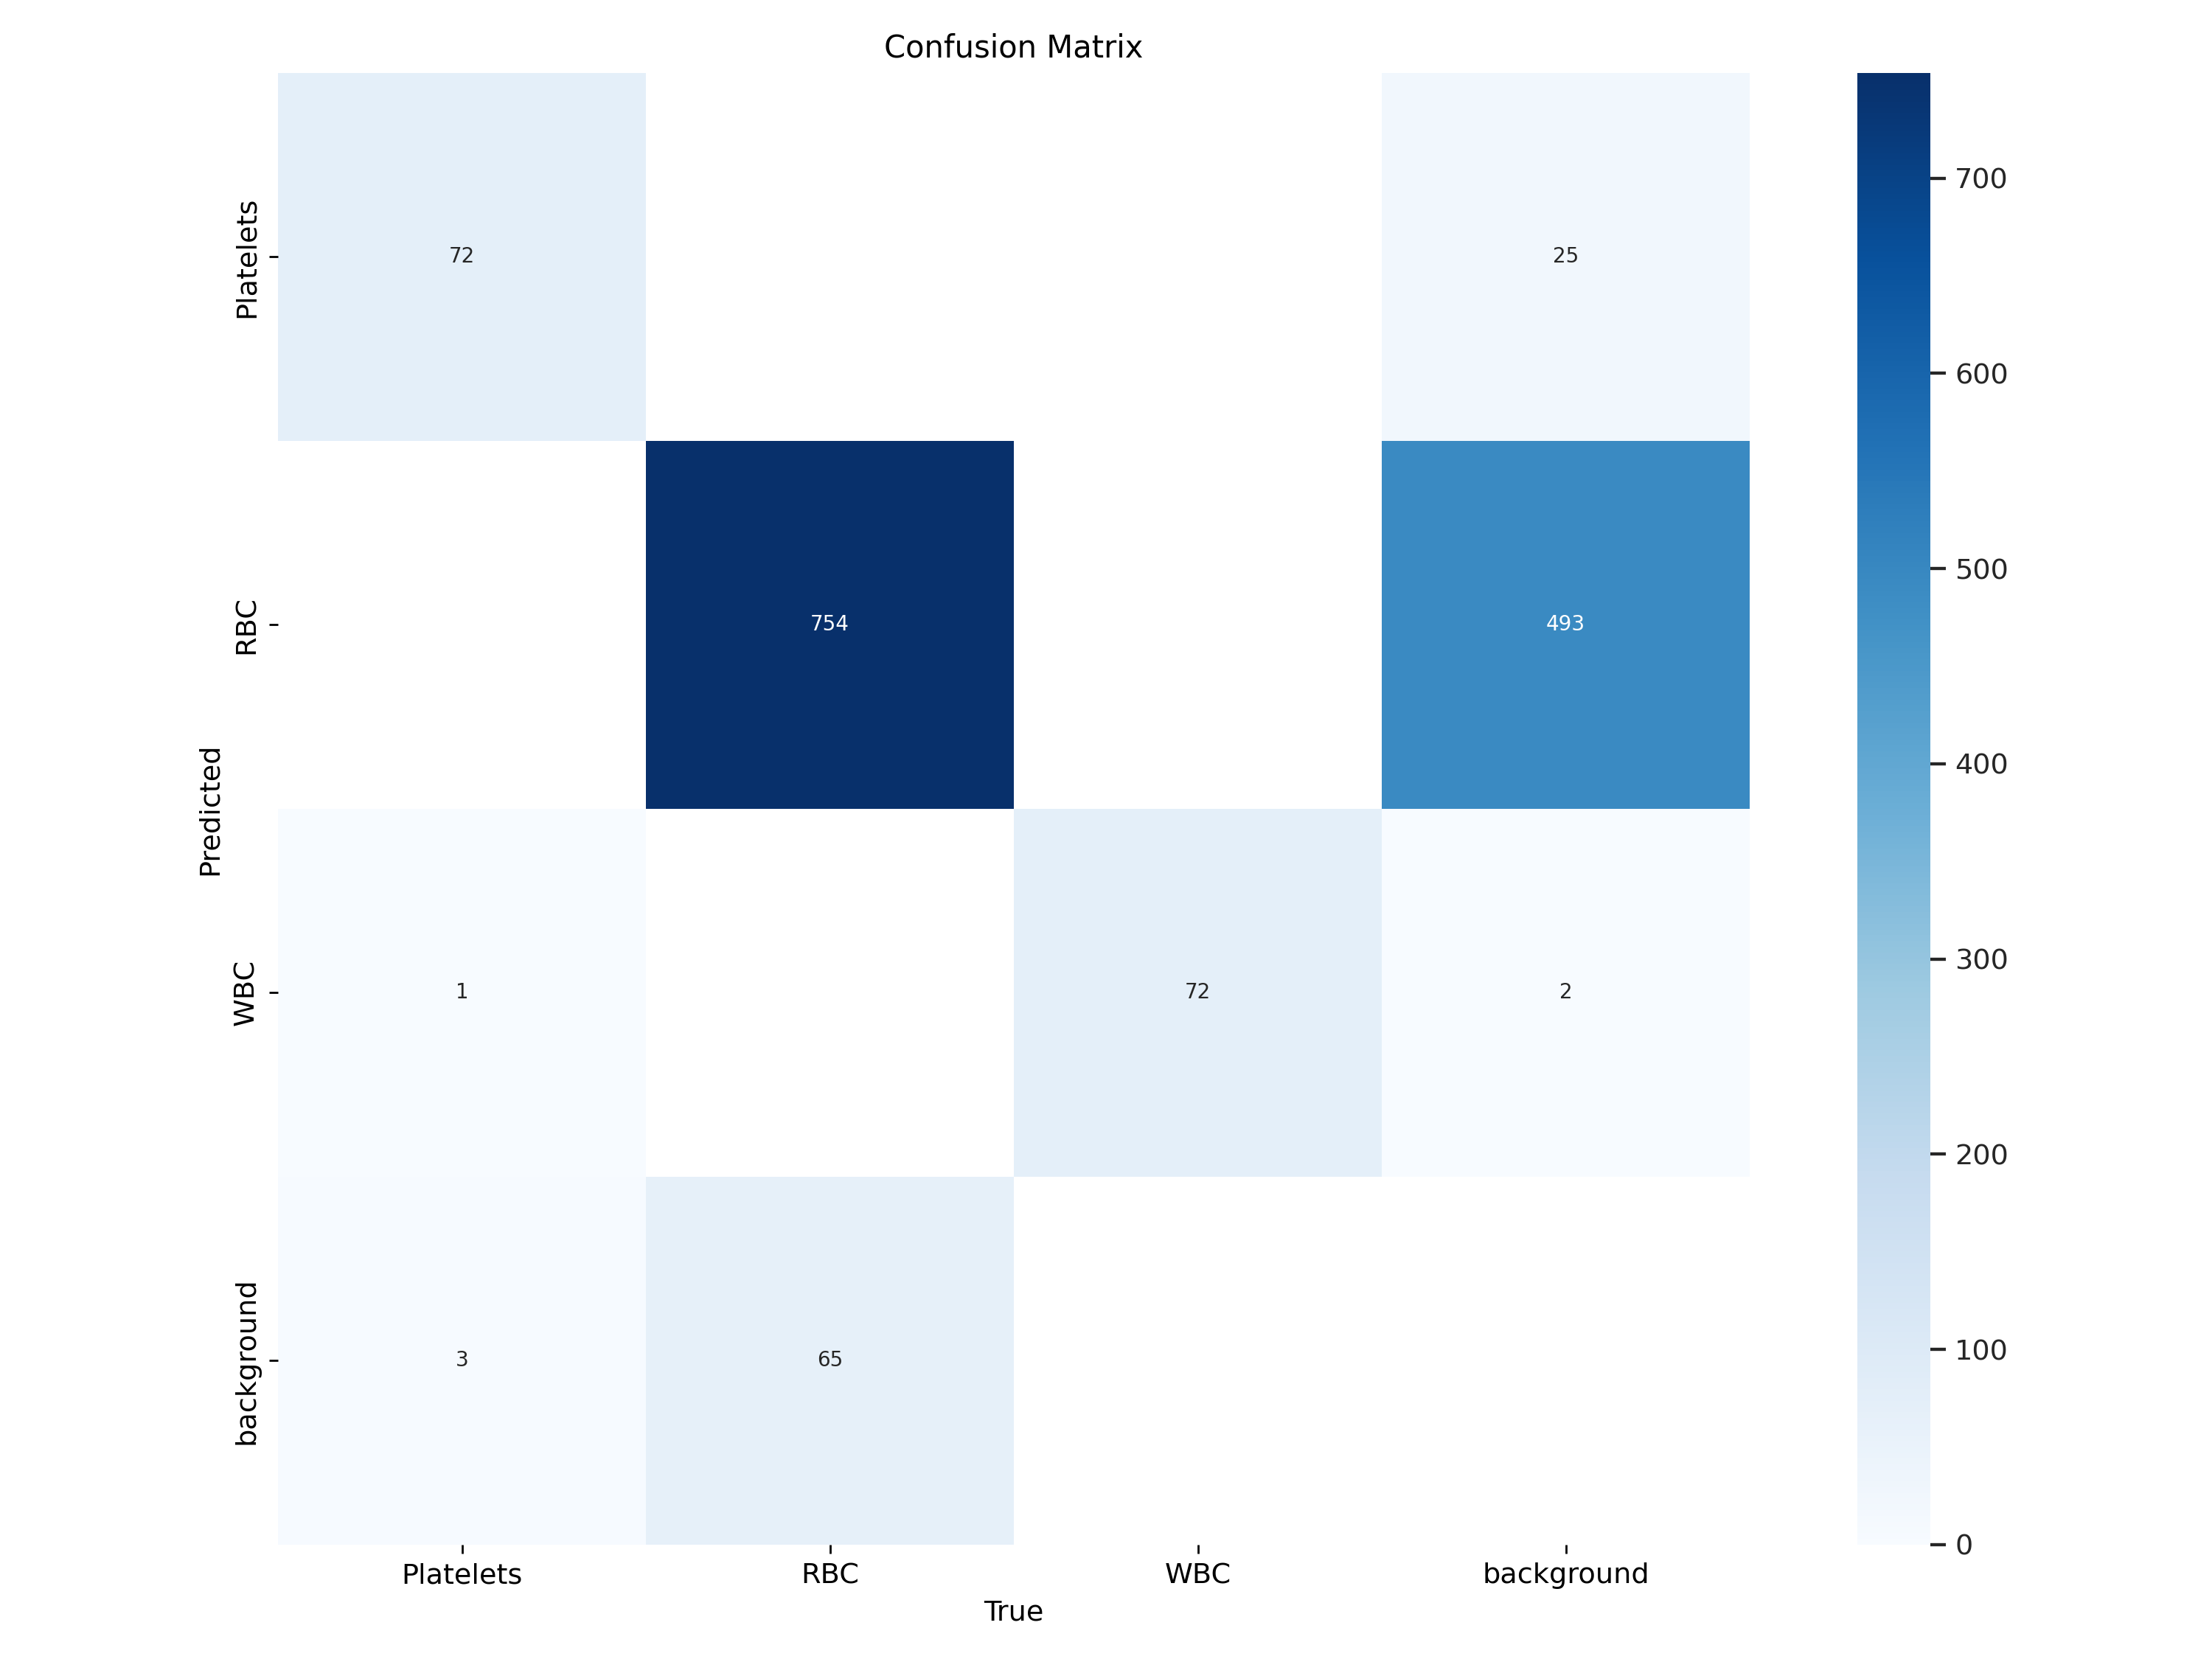

In [66]:
Image(filename =f'runs/detect/val_smthLab_240524/confusion_matrix.png', width = 800)

#background is the False negatives

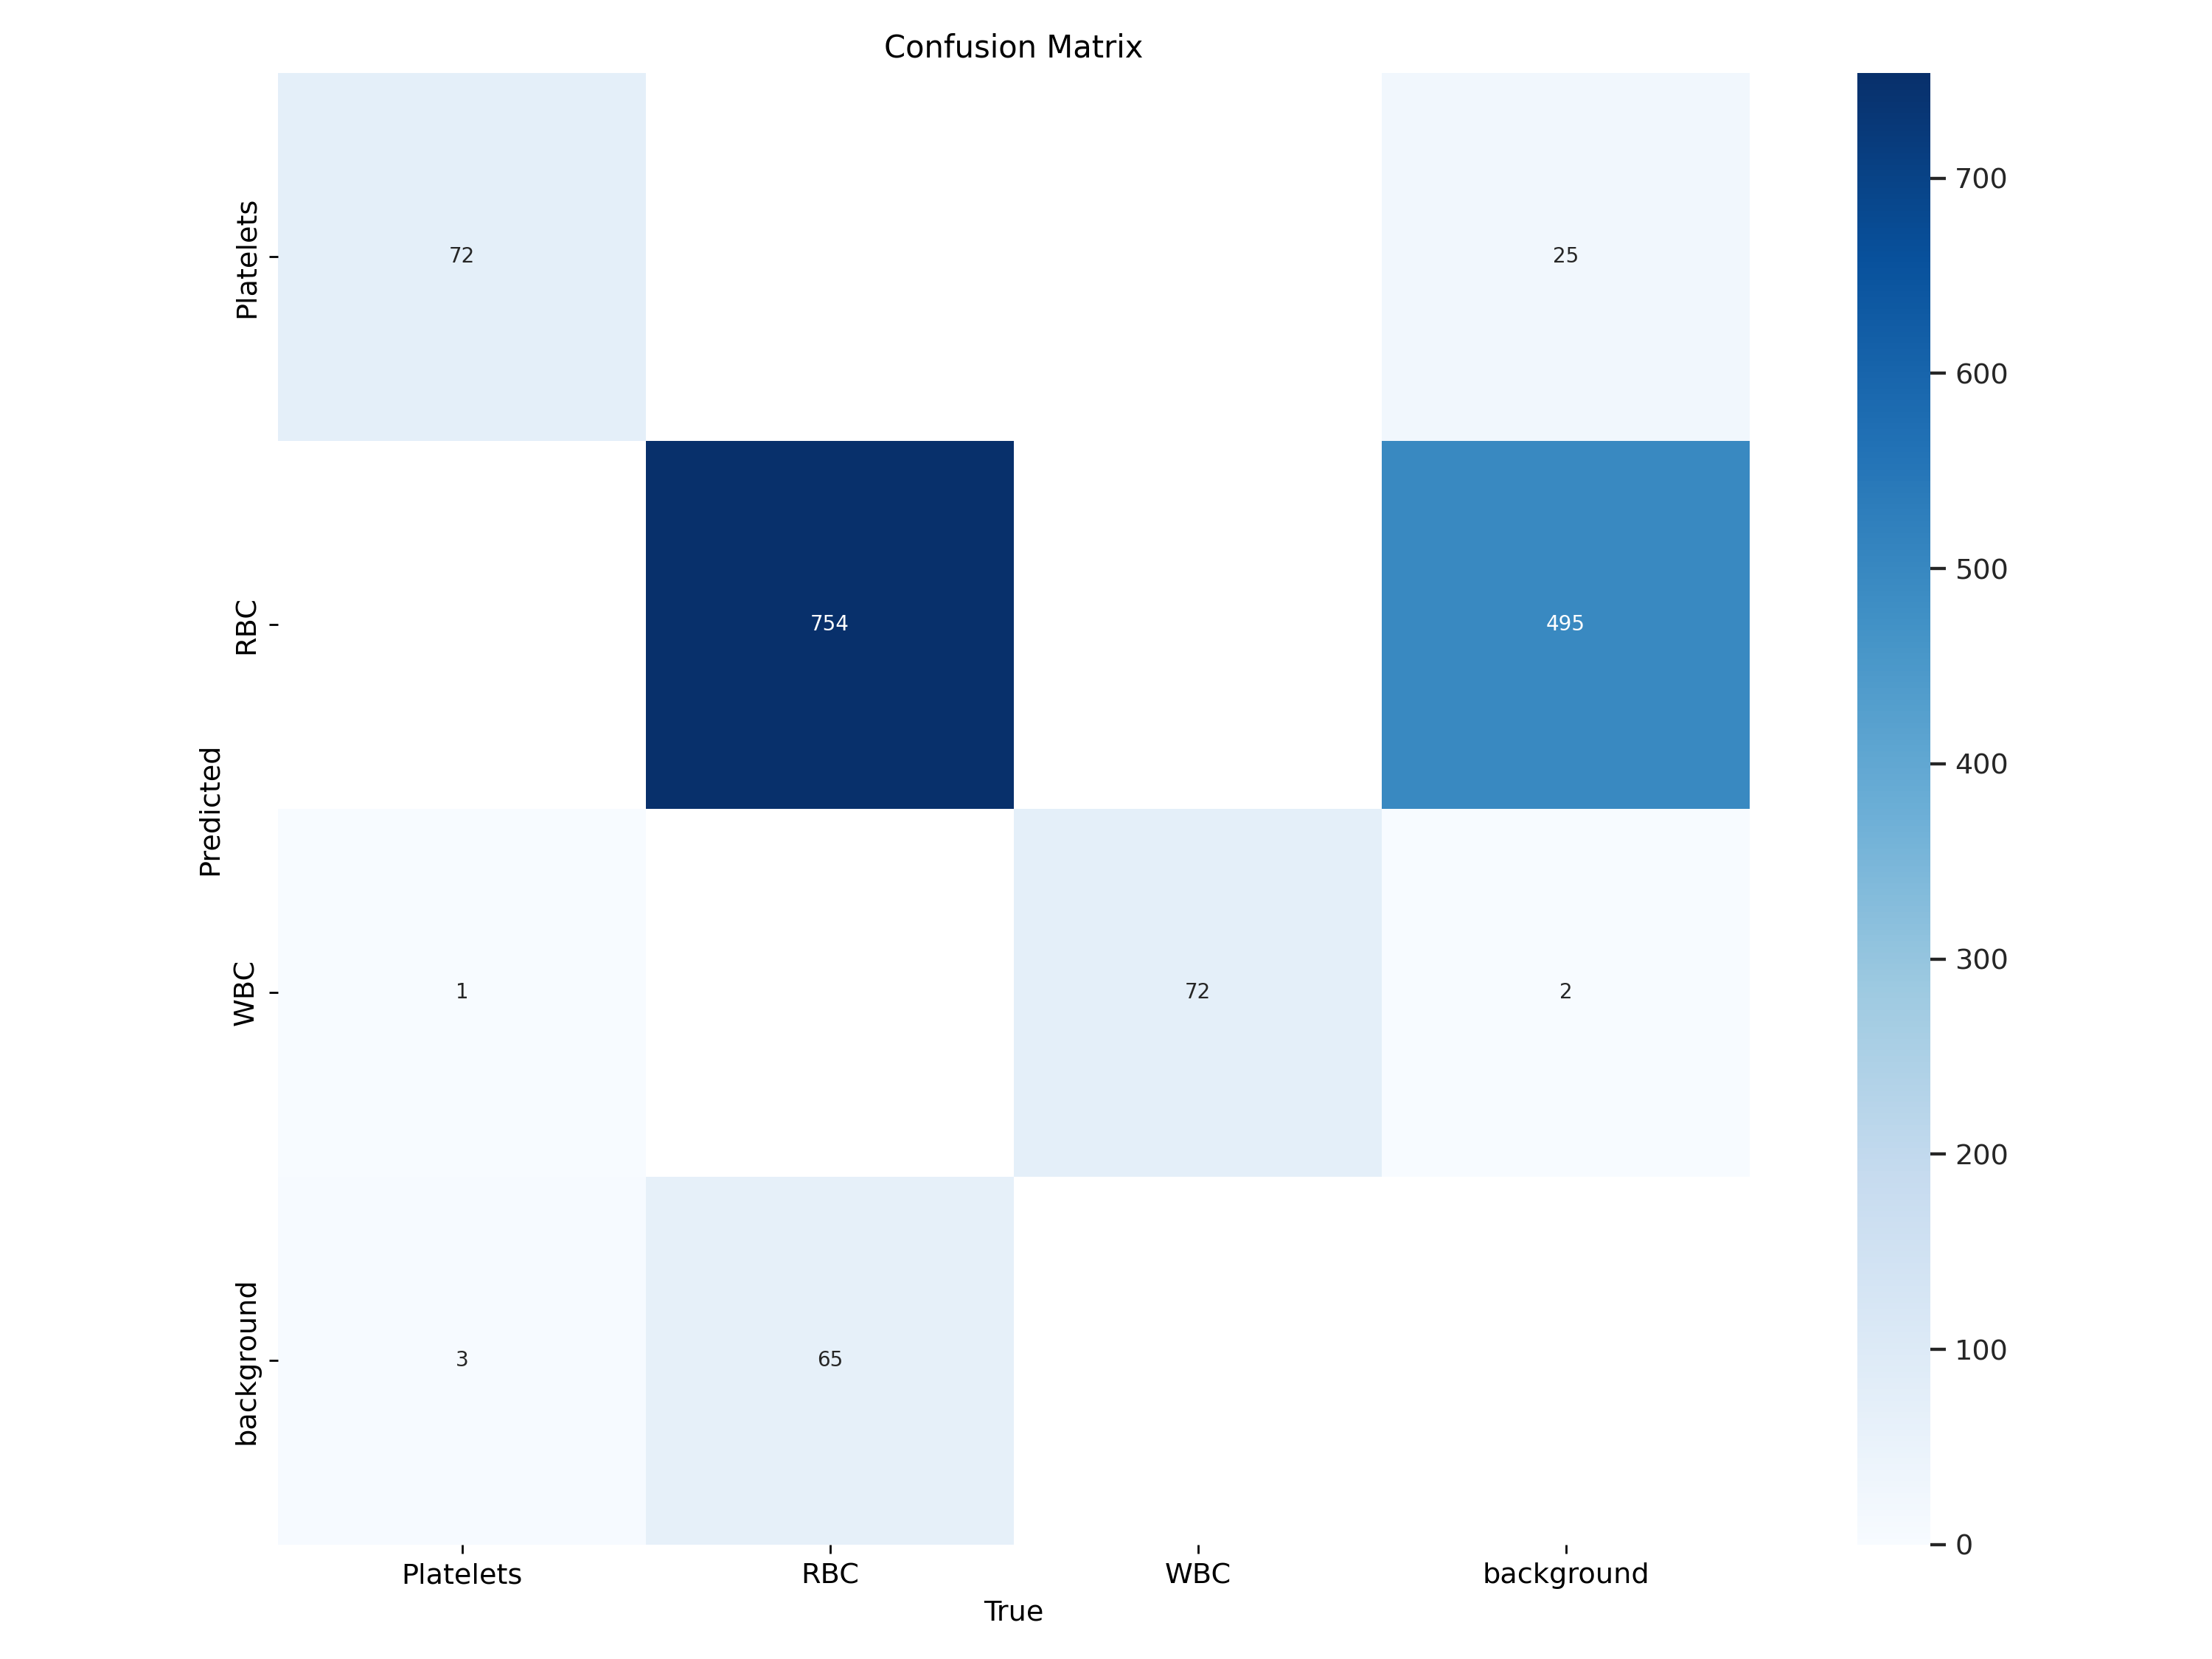

In [67]:
Image(filename =f'runs/detect/train_smthLab_240524/confusion_matrix.png', width = 800)

In [68]:
img_ls = ['DATA/test/images/BloodImage_00284_jpg.rf.63402cee4454cb6d7655b83cacc29817.jpg',
'DATA/test/images/BloodImage_00275_jpg.rf.585f5abcf10f926c74ac2e2340bbdf44.jpg',
'DATA/test/images/BloodImage_00090_jpg.rf.cdbf8f6ed3b93fa902a0bc991132cb40.jpg']

In [78]:
results1 = results1_labsmth1_val(img_ls)


0: 416x416 17 RBCs, 1 WBC, 15.5ms
1: 416x416 1 Platelets, 29 RBCs, 1 WBC, 15.5ms
2: 416x416 3 Plateletss, 15 RBCs, 1 WBC, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)


In [80]:
# Visualize the results
from PIL import Image

for i, r in enumerate(results1):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f'results{i}.jpg')

display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.
display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.
display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.


None
None
None
